# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Criar o dataframe lendo o arquivo com a biblioteca pandas
pd.set_option('display.max_columns', None)
df = pd.read_csv('ecommerce_preparados.csv')

print(df.head().to_string())

In [16]:
# Eliminar colunas que não serão usadas na análise ou trocar nomes de colunas
print(df.columns)
df = df.rename(columns={'Título': 'Peça'}, inplace=True)
print(df.columns)


Index(['Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material',
       'Gênero', 'Temporada', 'Qtd_Vendidos', 'Preço', 'Nota_MinMax',
       'N_Avaliações_MinMax', 'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod',
       'Material_Cod', 'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq',
       'Material_Freq'],
      dtype='object')
Index(['Peça', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material',
       'Gênero', 'Temporada', 'Qtd_Vendidos', 'Preço', 'Nota_MinMax',
       'N_Avaliações_MinMax', 'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod',
       'Material_Cod', 'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq',
       'Material_Freq'],
      dtype='object')


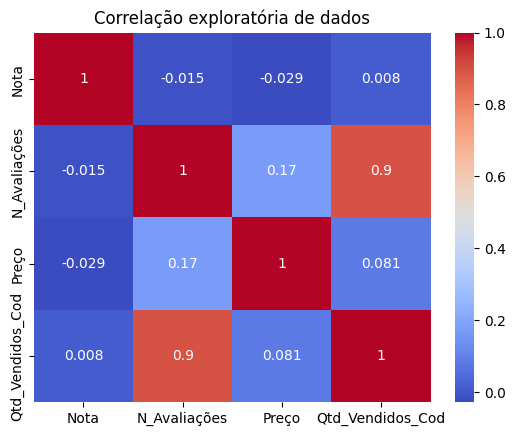

In [21]:
# Gerar o mapa de calor para estudar a relação entre algumas colunas
corr = df[['Nota', 'N_Avaliações', 'Preço', 'Qtd_Vendidos_Cod']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlação exploratória de dados')
plt.show()

A melhor correlação encontrada foi entre o número de avaliações e a quantidade de vendas, o que nos deixa inferir que quanto mais itens vendidos, maior a possibilidade de se obter avaliações sobre os mesmos.

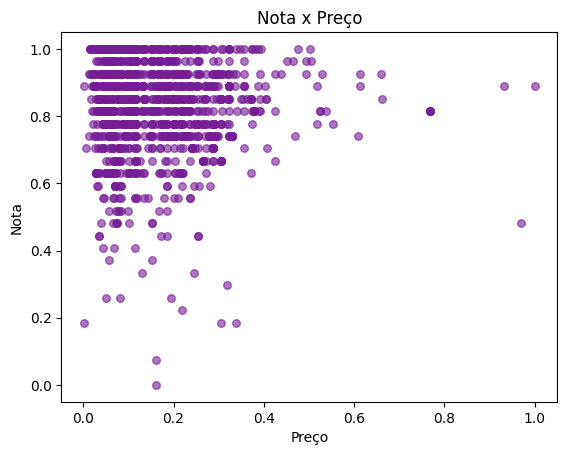

In [50]:
# Gerar um grafico de Dispersão entre Preço e Nota
plt.scatter(df['Preço_MinMax'], df['Nota_MinMax'], s = 30, alpha = 0.6, color = '#761d96')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.title('Nota x Preço')
plt.show()

Como as duas variáveis estão normalizadas podemos inferir que a atribuição de notas altas para peças com preços elevados são mais escassas.

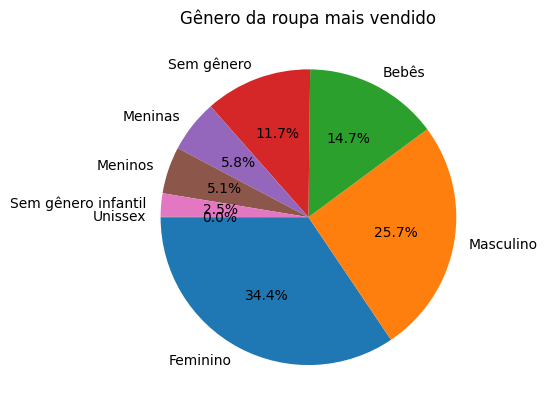

In [46]:
# Normalizar valores da coluna Gênero
df['Gênero'].unique()
df['Gênero'] = df['Gênero'].replace({ 'short menina verao look mulher': 'Meninas', 'Mulher': 'Feminino', 'roupa para gordinha pluss P ao 52': 'Feminino', 'menino': 'Meninos', 'bermuda feminina brilho Blogueira': 'Feminino', 'Menino': 'Meninos', 'Meninios': 'Meninos' })
df = df.dropna(subset=['Gênero'])
df['Gênero'].unique()

# Gráfico de pizza para analisar gênero de roupa mais vendido
x = df['Gênero'].value_counts().index
y = df['Gênero'].value_counts().values

plt.pie(y, labels = x, autopct = '%1.1f%%', startangle = 180)
plt.title('Gênero da roupa mais vendido')
plt.show()


A partir desse gráfico podemos inferir que o gênero lider em vendas é o Feminino, seguido por masculino e bebês.

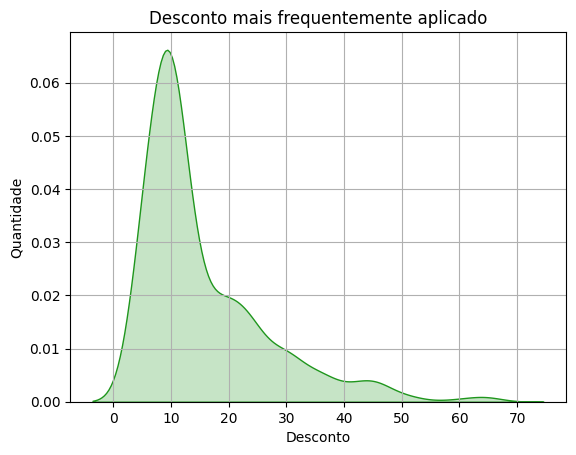

In [51]:
# Gráfico de demsidade para descobrir qual o desconto aplicado com maior frequência
sns.kdeplot(df['Desconto'], fill = True, color = '#1f961d')
plt.title('Desconto mais frequentemente aplicado')
plt.xlabel('Desconto')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

Este gráfico demonstra que existe uma alta frequência da aplicação do desconto de 10%, mas que, tanto antes como depois, essa tendência cai.

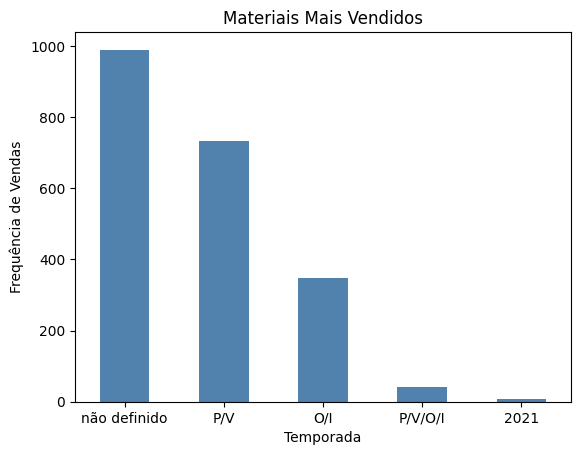

In [77]:
# Normalização e limpeza de dados de temporada
df['Temporada'].unique()
df['Temporada'] = df['Temporada'].replace({
    'primavera-verão': 'P/V',
    'outono-inverno': 'O/I',
    'primavera/verão': 'P/V',
    'primavera/verão/outono/inverno': 'P/V/O/I',
    'outono/inverno': 'O/I',
    'primavera-verão outono-inverno': 'P/V/O/I',
    'primavera/verão outono/inverno': 'P/V/O/I',
    'primavera-verão - outono-inverno': 'P/V/O/I',
})
df['Temporada'].unique()

# Gerar gráfico de barras para descobrir qual temporada mais vendida
df['Temporada'].value_counts().plot(kind = 'bar', color = '#5181ad')
plt.xlabel('Temporada')
plt.ylabel('Frequência de Vendas')
plt.title('Materiais Mais Vendidos')
plt.xticks(rotation = 0)
plt.show()


Para uma melhor legibilidade do gráfico os nomes das estações foram abreviados: Primavera: P, Verão: V, Outono: O, Inverno: I. Apesar disso o dataframe se mostrou incapaz de determinar com precisão qual a temporada da moda mais vendida, uma vez que a maioria dos dados estão classificados como não definido.